## <span style="color:blue"> Stroke Prediction Dataset (뇌졸중 예측 데이터셋) </span>
#### - 뇌졸중은 전세계적으로 2번째로 위험한 질병이며 약 11%가 사망 
#### - 환자의 성별, 나이, 질병, 흡연 여부를 판단하여 뇌졸중을 예측하는 데이터 셋

## <span style="color:blue"> Contents </span>
#### 1. Load Data
#### 2. Data Preprocessing
#### 3. Exploratory Data Analysis (EDA)
#### 4. Down-sampling
#### 5. ML Model Evaluation

## <span style="color:blue"> Attribute Information </span>
#### - 1. id : unique identifier
#### - 2. gender(성별) : Male, Female, Other
#### - 3. age(나이) 
#### - 4. hypertension(고혈압) : 0 --> doesn't have, 1 --> has
#### - 5. heart_disease(심장병) : 0 --> doesn't have, 1 --> has
#### - 6. ever_married(결혼여부) : Yes, No
#### - 7. work_type(일) : children, Govt_jov, Never_worked, Private, Self-employed
#### - 8. Residence_type(거주지) : Rural, Urban
#### - 9. avg_glucose_level(포도당 평균 수치) : average glucose level in blood
#### - 10. bmi(체질량지수) : body mass index
#### - 11. smoking_status(흡연여부) : formerly smoked, never smoked, smokes, Unknown
#### - 12. stroke(뇌졸중) : 0 --> doesn't have, 1 --> has

#### * Note: "Unknown" in smoking_status means that the information is unavailable for this patient

#### * 데이터 출처 : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## <span style ="color:blue"> 1. Load Data </span>

### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

### 파일 불러오기 (healthcare-dataset-stroke-data)

In [2]:
stroke_data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [3]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [5]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [6]:
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## <span style ="color:blue"> 2. Data Preprocessing </span>

### 결측치 확인

In [7]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 결측치 대체 및 확인

In [8]:
stroke_data = stroke_data.fillna({'bmi':stroke_data['bmi'].mean()})

In [9]:
stroke_data.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

### 성별 변수를 범주형으로 변경

In [10]:
stroke_data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [11]:
stroke_data = stroke_data[~stroke_data['gender'].str.contains('Other')]

In [12]:
stroke_data['gender'] = stroke_data['gender'].map(
    {'Male':0, 'Female':1}).astype('int')

In [13]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


### 흡연 여부 변수를 범주형으로 변경

In [14]:
stroke_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [15]:
stroke_data = stroke_data[~stroke_data['smoking_status'].str.contains('Unknown')]
stroke_data['smoking_status'].value_counts()

never smoked       1892
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64

In [16]:
stroke_data['smoking_status'] = stroke_data['smoking_status'].map(
    {'formerly smoked':0, 'never smoked':1, 'smokes':2}).astype('int')

In [17]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,0,1
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,1,1
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1,1
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1,1


### 나이 변수를 범주형으로 변경

In [18]:
# pd.qcut --> 이산화를 위한 함수
# qcut 함수 : 샘플의 변위치를 기반으로 이산화 수행. 특정 분위수를 계산하여 이산화 수행. 
# cut 함수 : 값들을 기반으로 이산화 수행. 즉, 사용자가 이산화를 할 수치를 직접 입력.

stroke_data['age_range'] = pd.qcut(stroke_data['age'],7)
stroke_data['age_range'].value_counts()

(9.999, 26.0]    543
(26.0, 37.0]     526
(53.0, 61.0]     521
(61.0, 72.0]     520
(45.0, 53.0]     508
(72.0, 82.0]     478
(37.0, 45.0]     469
Name: age_range, dtype: int64

In [19]:
stroke_data.loc[stroke_data['age'] <= 15, 'age_part'] = 0
stroke_data.loc[(stroke_data['age'] > 15) & (stroke_data['age'] <= 28), 'age_part'] = 1
stroke_data.loc[(stroke_data['age'] > 28) & (stroke_data['age'] <= 40), 'age_part'] = 2
stroke_data.loc[(stroke_data['age'] > 40) & (stroke_data['age'] <= 50), 'age_part'] = 3
stroke_data.loc[(stroke_data['age'] > 50) & (stroke_data['age'] <= 58), 'age_part'] = 4
stroke_data.loc[(stroke_data['age'] > 58) & (stroke_data['age'] <= 70), 'age_part'] = 5
stroke_data.loc[stroke_data['age'] > 70, 'age_part'] = 6

stroke_data['age_part'] = stroke_data['age_part'].astype('int')
stroke_data = stroke_data.drop(['age_range'], axis=1)

stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,0,1,5
1,51676,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,1,1,5
2,31112,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,1,1,6
3,60182,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,2,1,3
4,1665,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,1,1,6


In [20]:
stroke_data['age_part'].value_counts()

2    624
5    608
3    588
6    571
4    552
1    513
0    109
Name: age_part, dtype: int64

In [21]:
stroke_data['age'] = (stroke_data['age'].apply(np.ceil)).astype('int')

In [22]:
stroke_data.tail(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
5074,30379,1,52,0,0,Yes,Govt_job,Urban,104.00,25.600000,2,0,4
5076,39935,1,34,0,0,Yes,Private,Rural,174.37,23.000000,1,0,2
5080,22691,1,29,0,0,Yes,Self-employed,Urban,90.52,28.000000,1,0,2
5081,37680,0,55,0,0,Yes,Govt_job,Rural,108.35,40.800000,0,0,4
5082,24552,1,44,0,0,Yes,Private,Rural,72.03,37.500000,2,0,3
5084,29540,0,67,0,0,Yes,Private,Rural,97.04,26.900000,2,0,5
5085,53525,1,72,0,0,Yes,Private,Urban,83.89,33.100000,0,0,6
5087,26214,1,63,0,0,Yes,Self-employed,Rural,75.93,34.700000,0,0,5
5090,4211,0,26,0,0,No,Govt_job,Rural,100.85,21.000000,2,0,1
5091,6369,0,59,1,0,Yes,Private,Rural,95.05,30.900000,1,0,5


### 결혼 여부 변수를 범주형으로 변경

In [23]:
stroke_data['ever_married'].value_counts()

Yes    2710
No      855
Name: ever_married, dtype: int64

In [24]:
stroke_data['ever_married'] = stroke_data['ever_married'].map({'No':0, "Yes":1}).astype('int')

In [25]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,Private,Urban,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,Self-employed,Rural,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,Private,Rural,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,Private,Urban,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,Self-employed,Rural,174.12,24.000000,1,1,6


### 일하는 방식 변수를 범주형으로 변경

In [26]:
stroke_data['work_type'].value_counts()

Private          2284
Self-employed     663
Govt_job          535
children           69
Never_worked       14
Name: work_type, dtype: int64

In [27]:
stroke_data['work_type'] = stroke_data['work_type'].map({'Private':0, 'Self-employed':1, 'Govt_job':2, 'children':3, 'Never_worked':4}).astype('int')

In [28]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,0,Urban,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,1,Rural,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,0,Rural,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,0,Urban,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,1,Rural,174.12,24.000000,1,1,6


### 거주지 타입 변수를 범주형으로 변경

In [29]:
stroke_data['Residence_type'].value_counts()

Urban    1814
Rural    1751
Name: Residence_type, dtype: int64

In [30]:
stroke_data['Residence_type'] = stroke_data['Residence_type'].map({'Urban':0, 'Rural':1}).astype('int')

In [31]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,0,0,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,1,1,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,0,1,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,0,0,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,1,1,174.12,24.000000,1,1,6


In [32]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3565 non-null   int64  
 1   gender             3565 non-null   int32  
 2   age                3565 non-null   int32  
 3   hypertension       3565 non-null   int64  
 4   heart_disease      3565 non-null   int64  
 5   ever_married       3565 non-null   int32  
 6   work_type          3565 non-null   int32  
 7   Residence_type     3565 non-null   int32  
 8   avg_glucose_level  3565 non-null   float64
 9   bmi                3565 non-null   float64
 10  smoking_status     3565 non-null   int32  
 11  stroke             3565 non-null   int64  
 12  age_part           3565 non-null   int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 292.4 KB


## <span style ="color:blue"> 3. Exploratory Data Analysis (EDA) </span>

### 각 데이터프레임 컬럼 분석

In [33]:
print("stroke_data.shape: ", stroke_data.shape)
stroke_data.info()

stroke_data.shape:  (3565, 13)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3565 entries, 0 to 5108
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3565 non-null   int64  
 1   gender             3565 non-null   int32  
 2   age                3565 non-null   int32  
 3   hypertension       3565 non-null   int64  
 4   heart_disease      3565 non-null   int64  
 5   ever_married       3565 non-null   int32  
 6   work_type          3565 non-null   int32  
 7   Residence_type     3565 non-null   int32  
 8   avg_glucose_level  3565 non-null   float64
 9   bmi                3565 non-null   float64
 10  smoking_status     3565 non-null   int32  
 11  stroke             3565 non-null   int64  
 12  age_part           3565 non-null   int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 292.4 KB


In [34]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,0,0,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,1,1,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,0,1,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,0,0,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,1,1,174.12,24.000000,1,1,6


### 변수간 상관계수 분석

<AxesSubplot:title={'center':'Correlation of Features'}>

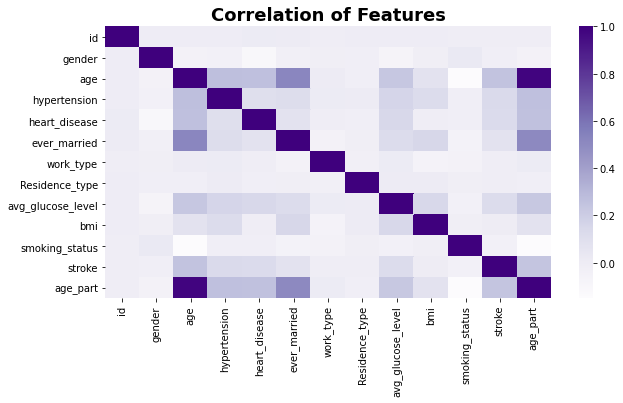

In [35]:
plt.rcParams['figure.figsize']=(10,5)
plt.title("Correlation of Features", fontsize=18, fontweight='bold')

sns.heatmap(stroke_data.corr(), cmap='Purples')

### 성별에 따른 뇌졸중 발생 분석

In [36]:
yes_stroke_data = stroke_data[stroke_data['stroke']==1]

In [37]:
yes_stroke_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,0,0,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,1,1,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,0,1,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,0,0,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,1,1,174.12,24.000000,1,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,10548,0,66,0,0,1,0,1,76.46,21.200000,0,1,5
241,52282,0,57,0,0,1,0,1,197.28,34.500000,0,1,4
242,45535,0,68,0,0,1,0,1,233.94,42.400000,1,1,5
243,40460,1,68,1,1,1,0,0,247.51,40.500000,0,1,5


In [38]:
gender_stroke = yes_stroke_data[['gender', 'stroke']].groupby(by=['gender'], as_index=False).count().sort_values(by=['gender'])
gender_stroke = gender_stroke.reset_index(drop=True)
gender_stroke

,gender,stroke
0,0,86
1,1,116


### 고혈압 유무에 따른 뇌졸중 발생 분석

In [39]:
hypertension_stroke = stroke_data[['hypertension', 'stroke']].groupby(by=['hypertension'], as_index=False).mean().sort_values(by=['hypertension'])
hypertension_stroke = hypertension_stroke.reset_index(drop=True)
hypertension_stroke

,hypertension,stroke
0,0,0.044886
1,1,0.139013


### 심장병 유무에 따른 뇌졸중 발생 분석

In [40]:
heart_disease_stroke = stroke_data[['heart_disease', 'stroke']].groupby(by=['heart_disease'], as_index=False).mean().sort_values(by=['heart_disease'])
heart_disease_stroke = heart_disease_stroke.reset_index(drop=True)
heart_disease_stroke

,heart_disease,stroke
0,0,0.048846
1,1,0.171053


### 뇌졸중 발생 비율 차트 

In [41]:
stroke_data['stroke'].value_counts()

0    3363
1     202
Name: stroke, dtype: int64

No stroke data:  3363 
Yes stroke data:  202


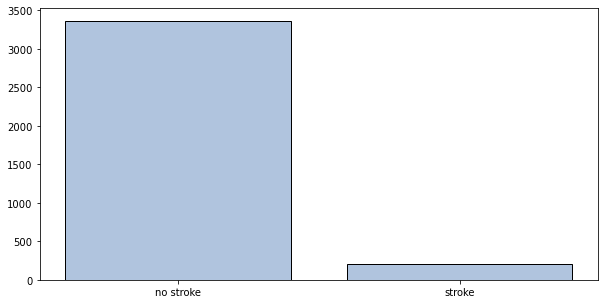

In [42]:
no_stroke_data_cnt = stroke_data[stroke_data['stroke']==0]['stroke'].count()
yes_stroke_data_cnt = yes_stroke_data['stroke'].count()

print("No stroke data: ",no_stroke_data_cnt, "\nYes stroke data: ",yes_stroke_data_cnt)

labels = ['no stroke', 'stroke']
cnt = [no_stroke_data_cnt, yes_stroke_data_cnt]

plt.bar(labels, cnt, color='lightsteelblue',edgecolor='black')
plt.show()

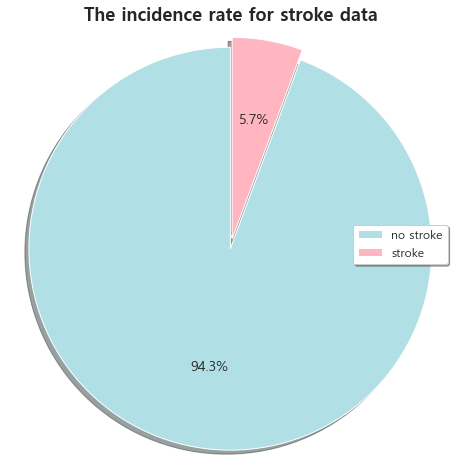

In [43]:
fig = plt.figure(figsize=(8,8))
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')

colors = ['powderblue', 'lightpink']
explode = (0.05, 0)
stroke_index = ['no stroke', 'stroke']

plt.pie(stroke_data['stroke'].value_counts(), colors = colors, explode = explode, shadow = True, 
        autopct="%1.1f%%", startangle = 90, textprops = {'fontsize':14})
plt.legend(stroke_index, loc = 'right', shadow = True, fontsize = 12)
plt.axis('equal')
plt.title("The incidence rate for stroke data", fontsize = 18, fontweight = 'bold')
plt.savefig("The incidence rate for stroke.png")
plt.show()


### 성별, 나이에 따른 뇌졸중 발생 분석 그래프 

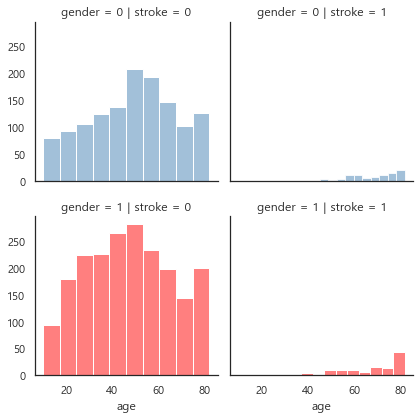

In [44]:
palette = ['steelblue', 'red']
facet = sns.FacetGrid(stroke_data, col='stroke', row='gender', hue = 'gender', 
                      palette = palette)
facet.map(sns.histplot, 'age', alpha = 0.5, bins=10)


### 나이에 따른 고혈압 발생 분석 

#### 고혈압이 있는 경우만 별도 저장

In [45]:
hypertension_true = stroke_data[stroke_data['hypertension'] == 1]

In [46]:
hypertension_true.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
4,1665,1,79,1,0,1,1,1,174.12,24.0,1,1,6
6,53882,0,74,1,1,1,0,1,70.09,27.4,1,1,6
10,12109,1,81,1,0,1,0,1,80.43,29.7,1,1,6
15,58202,1,50,1,0,1,1,1,167.41,30.9,1,1,3
17,34120,0,75,1,0,1,0,0,221.29,25.8,2,1,6


In [47]:
hypertension_true['age_part'].size

446

#### 나이에 따른 고혈압 발생 분석

In [48]:
hypertension_true['age_part'].value_counts(sort=False)

1      9
2     26
3     45
4     94
5    120
6    152
Name: age_part, dtype: int64

In [49]:
hypertension_true['age_part'].value_counts()

6    152
5    120
4     94
3     45
2     26
1      9
Name: age_part, dtype: int64

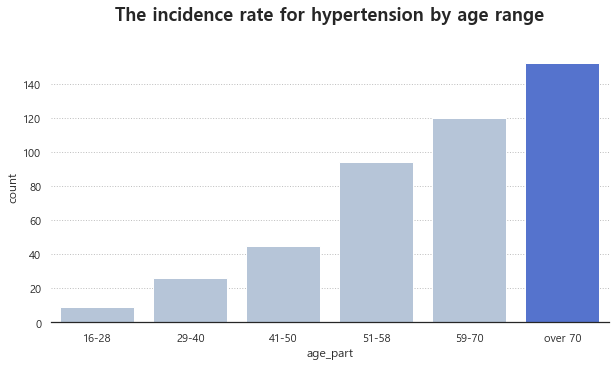

In [50]:
fig,ax = plt.subplots()
plt.rcParams['figure.figsize'] = (10,5)

palette = ['lightsteelblue' for _ in range(6)]
palette[5] = 'royalblue'

plt.title("The incidence rate for hypertension by age range", 
          fontweight='bold', fontsize=18, pad=30)
cnt_graph = sns.countplot(data=hypertension_true, x='age_part', 
                          palette=palette)
cnt_graph.set(xticklabels=(['16-28','29-40','41-50','51-58','59-70','over 70']))

ax.grid(color='silver', linestyle=":", axis='y')

for axis in ['top', 'left', 'right']:
    ax.spines[axis].set_visible(False)

plt.savefig("The incidence rate for hypertension by age.png")
plt.show()

### 고혈압에 따른 포도당 평균 수치 분석

#### 고혈압의 유무에 따른 포도당 평균 수치의 평균 값

In [51]:
hyper_true_glucoseLev = round(stroke_data[stroke_data['hypertension'] == 1]['avg_glucose_level'].mean(),2)
hyper_false_glucoseLev = round(stroke_data[stroke_data['hypertension'] == 0]['avg_glucose_level'].mean(),2)

In [52]:
index = [0,1]
avg_glucose_level_mean = [hyper_false_glucoseLev,hyper_true_glucoseLev]

hypertension_data = pd.DataFrame({'hypertension':index, 'avg_glucose_level_mean':avg_glucose_level_mean})

hypertension_data

,hypertension,avg_glucose_level_mean
0,0,105.97
1,1,130.00


In [53]:
hypertension_data = hypertension_data.set_index('hypertension')
hypertension_data

,avg_glucose_level_mean
hypertension,
0,105.97
1,130.00


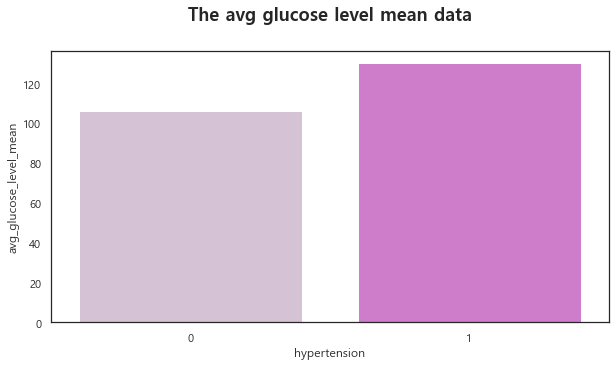

In [54]:
plt.rcParams['figure.figsize']=(10,5)
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='white')
fig,ax = plt.subplots()
palette = ['thistle', 'orchid']

sns.barplot(data=hypertension_data, x=hypertension_data.index, y='avg_glucose_level_mean', palette = palette)
plt.title("The avg glucose level mean data", fontsize=18, fontweight='bold', pad=30)
plt.savefig("The avg glucose level mean data.png")
plt.show()

### (심장병이 존재하는 경우) 나이,고혈압에 따른 체질량 지수 분석

#### 심장병이 있는 경우만 별도 저장

In [55]:
heart_disease_true = stroke_data[stroke_data['heart_disease']==1]

In [56]:
heart_disease_true['age_part'].value_counts()

6    115
5     63
4     34
3     14
1      1
2      1
Name: age_part, dtype: int64

In [57]:
heart_disease_true['age_part'].size

228

#### pivot table을 이용한 나이대, 고혈압에 따른 체질량 지수 분석

In [58]:
pivot = heart_disease_true.pivot_table(
    index='age_part', columns='hypertension', values='bmi')
pivot

hypertension,0,1
age_part,,
1,19.100000,NaN
2,28.893237,NaN
3,30.149436,34.750000
4,31.720456,36.920000
5,31.730209,33.349249
6,28.268468,28.864109


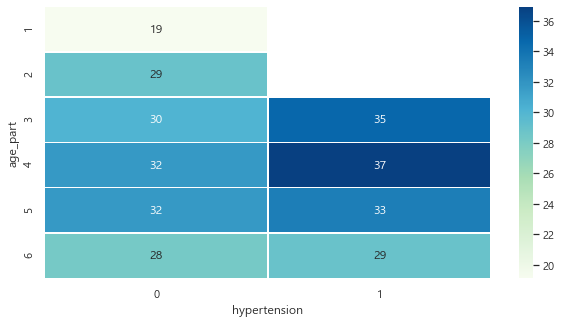

In [59]:
sns.heatmap(pivot, cmap='GnBu', annot=True, linewidths=0.5)
plt.savefig("heatmap.png")
plt.show()

In [60]:
stroke_data.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
0,9046,0,67,0,1,1,0,0,228.69,36.600000,0,1,5
1,51676,1,61,0,0,1,1,1,202.21,28.893237,1,1,5
2,31112,0,80,0,1,1,0,1,105.92,32.500000,1,1,6
3,60182,1,49,0,0,1,0,0,171.23,34.400000,2,1,3
4,1665,1,79,1,0,1,1,1,174.12,24.000000,1,1,6


### 성별, 체질량 지수에 따른 뇌졸중 발생 분석

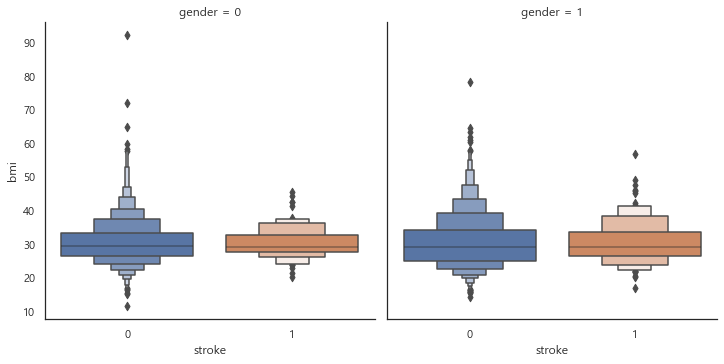

In [61]:
sns.catplot(data=stroke_data, x='stroke', y='bmi', col='gender', kind='boxen')

### 흡연 상태, 포도당 평균 수치에 따른 뇌졸중 발생 분석

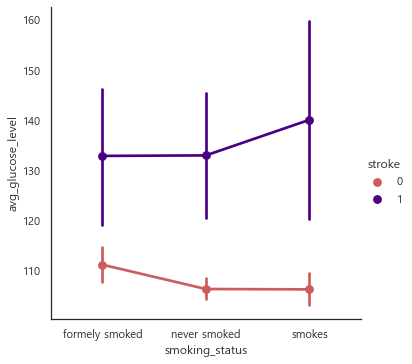

In [62]:
palette = ['indianred','indigo']
catplot_graph = sns.catplot(data=stroke_data, x='smoking_status', y='avg_glucose_level', hue='stroke', kind='point', palette=palette)
catplot_graph.set(xticklabels=(["formely smoked","never smoked","smokes"]))

### 결혼 유무, 나이에 따른 뇌졸중 발생 분석

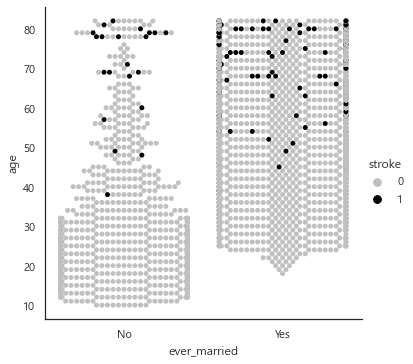

In [63]:
palette = ['silver','black']
swarmplot_graph = sns.catplot(data=stroke_data, x="ever_married", y="age", hue="stroke", kind='swarm', palette = palette)
swarmplot_graph.set(xticklabels=(['No', 'Yes']))

### 일하는 방식, 거주지 타입에 따른 뇌졸중 발생 분석

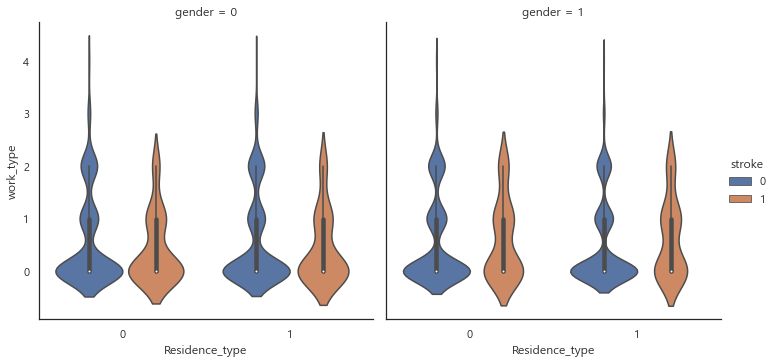

In [64]:
sns.catplot(data=stroke_data, x='Residence_type', y='work_type', col='gender', hue='stroke', kind='violin')

## <span style ="color:blue"> 4. Down-sampling </span>

#### Class imbalance (클래스 불균형)이란?
#### - 어떤 데이터에서 각 클래스가 갖고 있는 데이터의 양에 차이가 큰 경우를 의미
#### - 소수 클래스의 의견에 귀를 기울이기 위한 작업 필요

#### 1) Weight balancing
#### * Train 데이터에서 각 loss를 계산할 때, 특정 클래스에 대해서는 더 큰 loss를 계산
#### * 또는, 클래스의 비율에 대해 가중치를 줌
#### 2) Up-sampling / Down-sampling
#### * Up-sampling : 양이 적은 데이터를 양이 많은 데이터에 맞추는 방법
#### * Down-sampling : 양이 많은 데이터를 양이 적은 데이터에 맞추는 방법

In [65]:
no_stroke_data = stroke_data[stroke_data['stroke']==0]
print(">> Before sampling \n")
print("No stroke data: ", no_stroke_data_cnt, "\nYes stroke data: ", yes_stroke_data_cnt)

new_no_stroke_data = no_stroke_data.sample(800)
sample_stroke_data = pd.concat([new_no_stroke_data, yes_stroke_data], axis=0)

print("\n>> After sampling \n")
print("No stroke data: ", new_no_stroke_data['stroke'].count(), "\nYes stroke data: ", yes_stroke_data_cnt)

sample_stroke_data = sample_stroke_data.sample(frac=1)
sample_stroke_data.head(10)

>> Before sampling 

No stroke data:  3363 
Yes stroke data:  202

>> After sampling 

No stroke data:  800 
Yes stroke data:  202


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_part
4497,37440,0,52,0,0,1,2,0,208.39,36.0,0,0,4
3449,18266,1,67,0,0,1,0,1,102.89,26.4,1,0,5
2673,49702,1,81,0,0,1,1,1,101.32,29.6,0,0,6
4974,16513,0,78,0,0,1,0,0,104.37,29.7,1,0,6
4534,49053,1,45,0,0,0,0,1,120.56,31.6,1,0,3
2841,4913,1,57,0,0,1,0,1,93.85,29.1,1,0,4
5037,69710,1,46,0,0,0,1,1,64.09,25.3,1,0,3
4011,67277,0,42,0,0,1,0,1,67.87,30.0,1,0,3
4705,31596,1,24,0,0,0,0,0,95.31,22.8,1,0,1
2093,54997,1,53,0,0,1,1,1,72.49,38.5,1,0,4


## <span style ="color:blue"> 5. ML Model Evaluation </span>

### Feature과 Label 정의

In [66]:
feature = sample_stroke_data[['age', 'hypertension', 'heart_disease', 'bmi', 'avg_glucose_level', 'smoking_status']]
label = sample_stroke_data['stroke']

### 데이터 정규화

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(feature)

### 학습 데이터와 테스트 데이터 분리

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, label, test_size=0.3, random_state=42)

### 머신러닝 라이브러리 불러오기

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix

### Machine Learning Model

#### 1. Linear Regression Model
#### 2. Logistic Regression Model
#### 3. XGBoost Model
#### 4. RandomForest Model
#### 5. KNN Model

### <span style = "color:chocolate"> 예측 모델 설명 </span>

#### 1. Linear Regression
#### - 독립 변수 X를 사용하여 종속 변수인 Y의 움직임을 예측하고 설명하는 것
#### - 쉽게 말해, 1차원 방정식의 기울기를 구하는 것
#### 2. Logistic Regression
#### - 회귀를 사용하여 데이터가 어떤 범주에 속할 확률을 0에서 1사이의 값으로 예측하고,
#### - 그 확률에 따라 가능성이 더 높은 범주에 속하는 것으로 분류해주는 지도 학습 알고리즘
#### 3. XGBoost
#### - Extreme Gradient Boosting의 약자
#### - 여러 개의 약한 의사결정나무를 조합해서 사용하는 앙상블 기법 중 하나
#### 4. Random Forest
#### - 여러 개의 작은 결정 트리를 만들고 해당 트리가 예측한 값들 중 가장 많은 값 혹은 평균값을 최종 예측값으로 정함
#### - 즉, 다수결의 원칙을 따름 (의견을 통합하거나 여러 가지 결과를 합치는 방식인 앙상블 학습 방법)
#### 5. KNN
#### - 데이터를 가장 가까운 속성에 따라 분류하여 레이블링 하는 알고리즘
#### - K개의 가장 가까운 이웃의 속성에 따라 분류

### Linear Regression Model

In [70]:
model_linear = LinearRegression(normalize=True)
model_linear.fit(X_train, y_train)

LinearRegression(normalize=True)

In [71]:
pred = model_linear.predict(X_test)

print(">> Linear Regression Model Evaluation <<")
print("-------------------------------------------")
print("Accuracy : ", accuracy_score(y_test, pred.round()))
print("Precision : ",precision_score(y_test,pred.round()))
print("Recall : ",recall_score(y_test,pred.round()))
print("f1_score : ",f1_score(y_test,pred.round()))
print("-------------------------------------------")

>> Linear Regression Model Evaluation <<
-------------------------------------------
Accuracy :  0.8205980066445183
Precision :  0.6071428571428571
Recall :  0.2833333333333333
f1_score :  0.3863636363636363
-------------------------------------------


### Logistic Regression Model

In [72]:
model_lr = LogisticRegression(max_iter=1000,random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [73]:
pred = model_lr.predict(X_test)

print(">> Logistic Regression Model Evaluation <<")
print("-------------------------------------------")
print("Accuracy : %.2f" % accuracy_score(y_test,pred))
print("Precision : %.2f" % precision_score(y_test,pred))
print("Recall : %.2f" % recall_score(y_test,pred))
print("f1_score : %.2f" % f1_score(y_test,pred))
print("-------------------------------------------")
print(classification_report(y_test, pred))


>> Logistic Regression Model Evaluation <<
-------------------------------------------
Accuracy : 0.81
Precision : 0.53
Recall : 0.40
f1_score : 0.46
-------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.91      0.89       241
           1       0.53      0.40      0.46        60

    accuracy                           0.81       301
   macro avg       0.70      0.66      0.67       301
weighted avg       0.79      0.81      0.80       301



### XGBoost Model

In [86]:
model_xgb = XGBClassifier(random_state=42)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

In [87]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       241
           1       0.38      0.30      0.34        60

    accuracy                           0.76       301
   macro avg       0.61      0.59      0.60       301
weighted avg       0.74      0.76      0.75       301



### RandomForest Model

In [88]:
model_forest = RandomForestClassifier(random_state=42)
model_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       241
           1       0.55      0.40      0.46        60

    accuracy                           0.81       301
   macro avg       0.70      0.66      0.67       301
weighted avg       0.80      0.81      0.80       301



<AxesSubplot:>

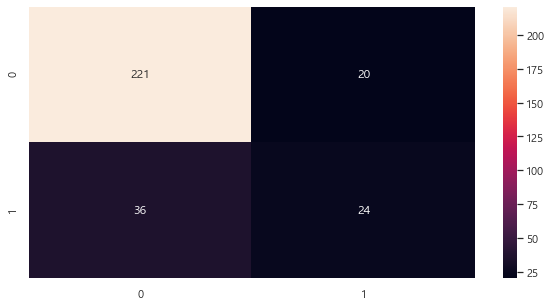

In [89]:
pred = model_forest.predict(X_test)
print(classification_report(y_test, pred))

confmat = confusion_matrix(y_test, pred)
sns.heatmap(confmat, annot=True, fmt='d')

### KNN Model

In [90]:
model_knn = KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88       241
           1       0.47      0.25      0.33        60

    accuracy                           0.79       301
   macro avg       0.65      0.59      0.60       301
weighted avg       0.76      0.79      0.77       301



<AxesSubplot:>

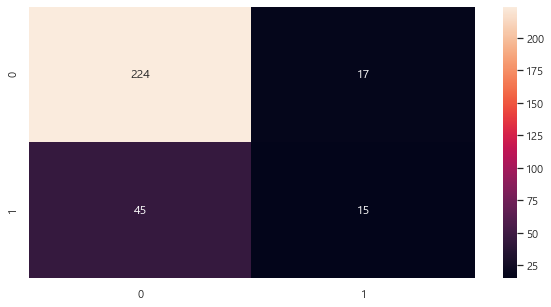

In [91]:
pred = model_knn.predict(X_test)
print(classification_report(y_test, pred))

confmat = confusion_matrix(y_test, pred)
sns.heatmap(confmat, annot=True, fmt="d")

### Precision-Recall Curve

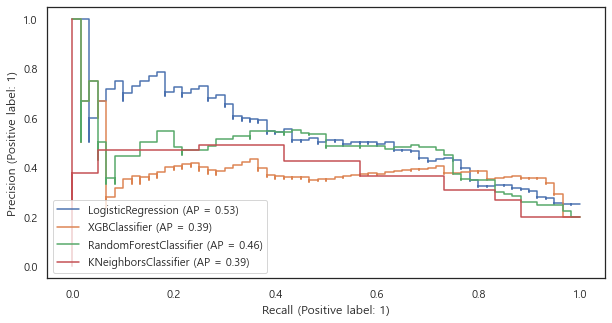

In [93]:
fig = plt.figure()
ax = fig.gca()

plot_precision_recall_curve(model_lr, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_forest, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_knn, X_test, y_test, ax=ax)

### ROC Curve

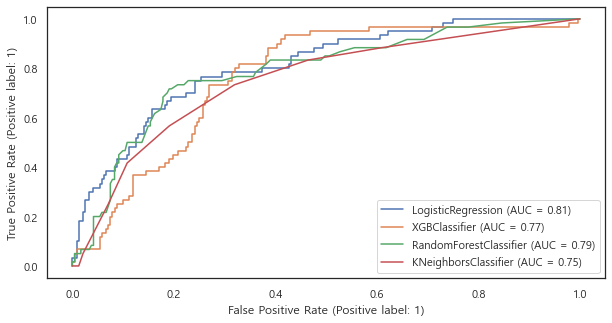

In [94]:
fig = plt.figure()
ax = fig.gca()

plot_roc_curve(model_lr, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)
plot_roc_curve(model_forest, X_test, y_test, ax=ax)
plot_roc_curve(model_knn, X_test, y_test, ax=ax)